In [1]:
!pip install lifetimes jcopml

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifetimes.utils import summary_data_from_transaction_data
from jcopml.plot import plot_missing_value

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMadf_scaled1Scaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Adf_scaled1es3D 
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('C:/Users/ThinkPad/OneDrive/Documents/SDPI/Customer Segmentation.tdf_scaled1t', delimiter="\t")
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


EDA

In [4]:
df.dtypes

Customer_ID            object
Nama Pelanggan         object
Jenis Kelamin          object
Umur                    int64
Profesi                object
Tipe Residen           object
NilaiBelanjaSetahun     int64
dtype: object

,missing_value,%
Customer_ID,0,0.0
Nama Pelanggan,0,0.0
Jenis Kelamin,0,0.0
Umur,0,0.0
Profesi,0,0.0
Tipe Residen,0,0.0
NilaiBelanjaSetahun,0,0.0


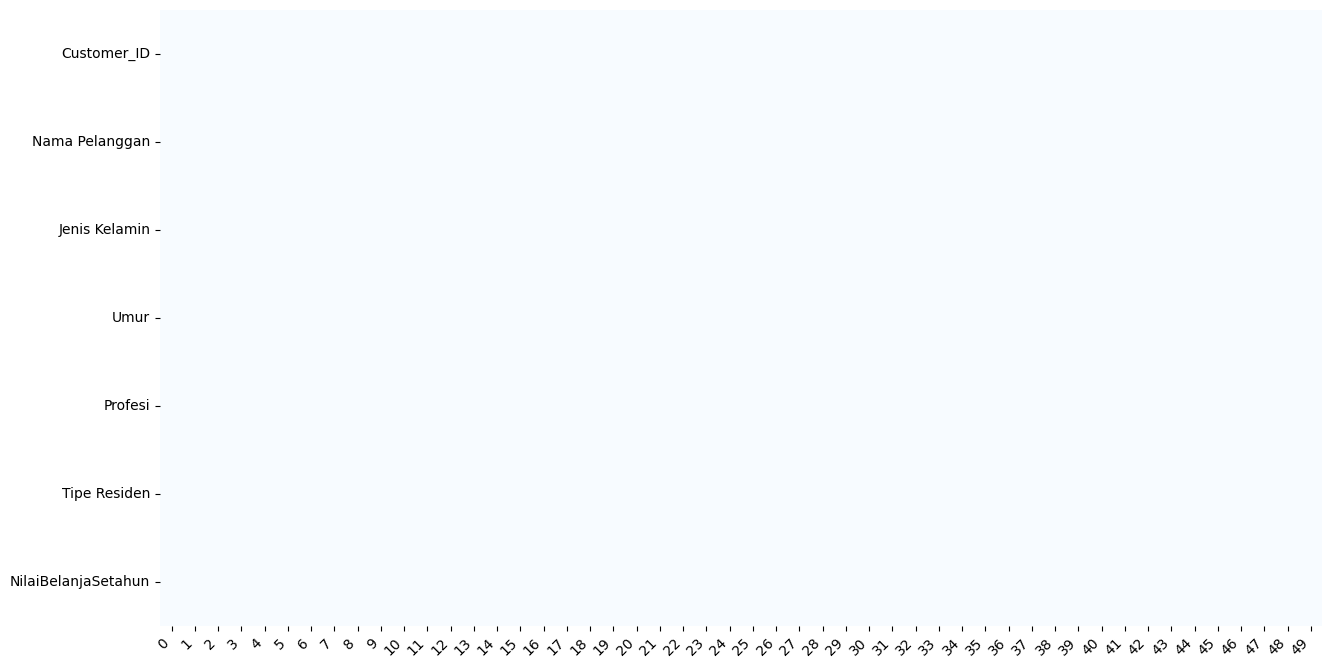

In [5]:
plot_missing_value(df, return_df = True)

In [6]:
df.describe()

,Umur,NilaiBelanjaSetahun
count,50.000000,5.000000e+01
mean,37.500000,7.069875e+06
std,14.673661,2.590619e+06
min,14.000000,2.722700e+06
25%,25.000000,5.257530e+06
50%,35.000000,5.980077e+06
75%,49.750000,9.739615e+06
max,64.000000,1.088451e+07


Dari variabel numerik ini saya akan melakukan segmentasi pelanggan berdasarkan umur dan nilai belanja setahun

Nilai belanja tahunan juga cukup bervariasi, dari min 2.72 juta hingga max 10.88 juta, mungkin ada pelanggan dengan spending yang jauh lebih tinggi dari yang lain, yang bisa dikategorikan sebagai VIP customers

Saya juga akan mengecek apakah umur punya hubungan signifikan dengan pengeluaran pelanggan

Identifikasi Outlier

Outlier Umur

In [7]:
q1_quan = df['Umur'].quantile(0.25)
q3_quan = df['Umur'].quantile(0.75)
iqr_quan = q3_quan - q1_quan
lb_quan = float(q1_quan) - (1.5 * iqr_quan)
ub_quan = float(q3_quan) + (1.5 * iqr_quan)

print('Q1 = {}'.format(q1_quan))
print('Q3 = {}'.format(q3_quan))
print('IQR = Q3 - Q1 = {}'.format(iqr_quan))
print('lower bound = Q1 - 1.5 * IQR = {}'.format(lb_quan))
print('upper bound = Q3 + 1.5 * IQR = {}'.format(ub_quan))

Q1 = 25.0
Q3 = 49.75
IQR = Q3 - Q1 = 24.75
lower bound = Q1 - 1.5 * IQR = -12.125
upper bound = Q3 + 1.5 * IQR = 86.875


Outlier Nilai Belanja Setahun

In [8]:
q1_unit = df['NilaiBelanjaSetahun'].quantile(0.25)
q3_unit = df['NilaiBelanjaSetahun'].quantile(0.75)
iqr_unit = q3_unit - q1_unit 
lb_unit = float(q1_unit) - (1.5 * iqr_unit)
ub_unit = float(q3_unit) + (1.5 * iqr_unit)

print('Q1 = {}'.format(q1_unit))
print('Q3 = {}'.format(q3_unit))
print('IQR = Q3 - Q1 = {}'.format(iqr_unit))
print('lower bound = Q1 - 1.5 * IQR = {}'.format(lb_unit))
print('upper bound = Q1 - 1.5 * IQR = {}'.format(ub_unit))

Q1 = 5257529.75
Q3 = 9739615.0
IQR = Q3 - Q1 = 4482085.25
lower bound = Q1 - 1.5 * IQR = -1465598.125
upper bound = Q1 - 1.5 * IQR = 16462742.875


Hubungan antara Umur dan Nilai Belanja Setahun

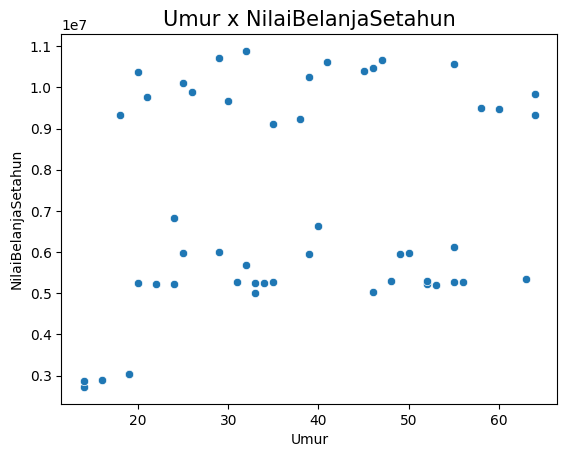

In [9]:
sns.scatterplot(x=df['Umur'], y=df['NilaiBelanjaSetahun'])
plt.title('Umur x NilaiBelanjaSetahun', fontsize=15)
plt.show()

Scatter plot di atas makin jelas hubungan antar kedua kolom
- Umur dibawah 20 tahun, Nilai belanja per tahunya itu 2 jutaan sampai dengan 3 jutaan
- Umur dengan lebih dari 20 tahun, ada 2 Nilai Belanja, Nilai belanja yang pertama 5-7 jutaan dan 9-11 jutaan

Umur -> Q1: 25.0, Q3: 49.75, IQR: 24.75, LB: -12.125, UB: 86.875
NilaiBelanjaSetahun -> Q1: 5257529.75, Q3: 9739615.0, IQR: 4482085.25, LB: -1465598.125, UB: 16462742.875


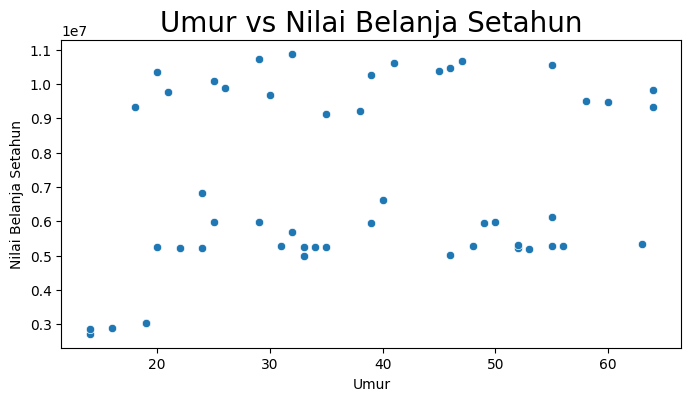

In [10]:
print(f"Umur -> Q1: {q1_quan}, Q3: {q3_quan}, IQR: {iqr_quan}, LB: {lb_quan}, UB: {ub_quan}")
print(f"NilaiBelanjaSetahun -> Q1: {q1_unit}, Q3: {q3_unit}, IQR: {iqr_unit}, LB: {lb_unit}, UB: {ub_unit}")

df_filtered = df[
    (df['Umur'] >= lb_quan) & (df['Umur'] <= ub_quan) &
    (df['NilaiBelanjaSetahun'] >= lb_unit) & (df['NilaiBelanjaSetahun'] <= ub_unit)
]

# Visualisasi scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df_filtered['Umur'], y=df_filtered['NilaiBelanjaSetahun'])
plt.title('Umur vs Nilai Belanja Setahun', fontsize=20)
plt.xlabel('Umur')
plt.ylabel('Nilai Belanja Setahun')
plt.show()

Distribusi Umur dan Nilai Belanja Setahun

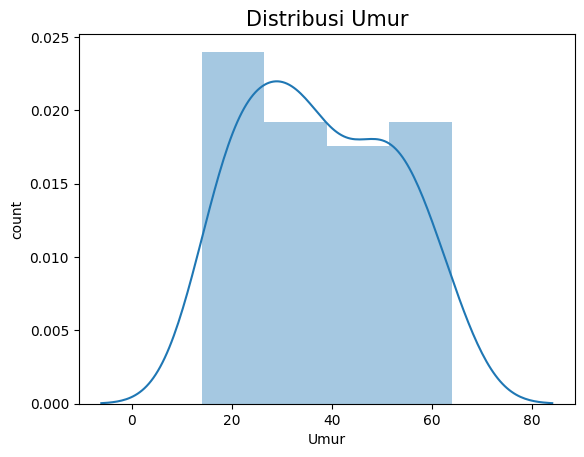

In [11]:
sns.distplot(df['Umur'])
plt.title('Distribusi Umur', fontsize = 15)
plt.xlabel('Umur')
plt.ylabel('count');

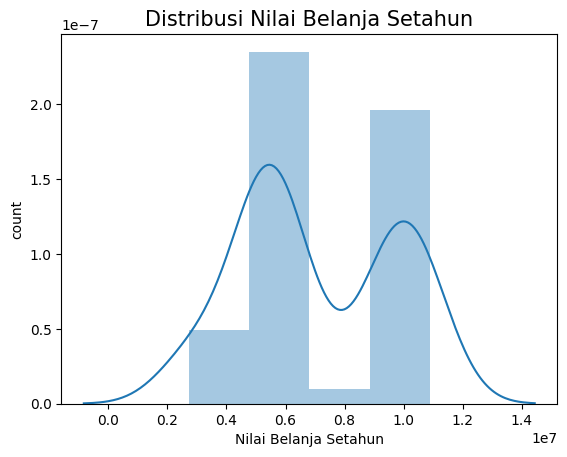

In [12]:
sns.distplot(df['NilaiBelanjaSetahun'])
plt.title('Distribusi Nilai Belanja Setahun', fontsize = 15)
plt.xlabel('Nilai Belanja Setahun')
plt.ylabel('count');

Plot profesi dan tipe residen terbanyak

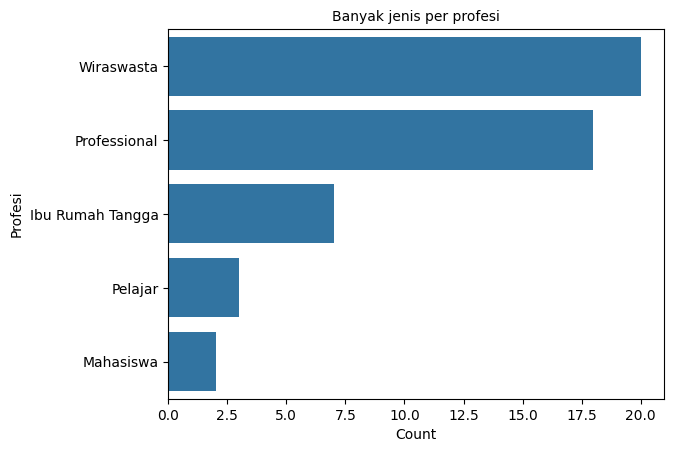

In [13]:
x = df['Profesi'].value_counts().head(5)
sns.barplot(x = x.values, y = x.index, )
plt.title('Banyak jenis per profesi', fontsize = 10)
plt.xlabel('Count')
plt.ylabel('Profesi');

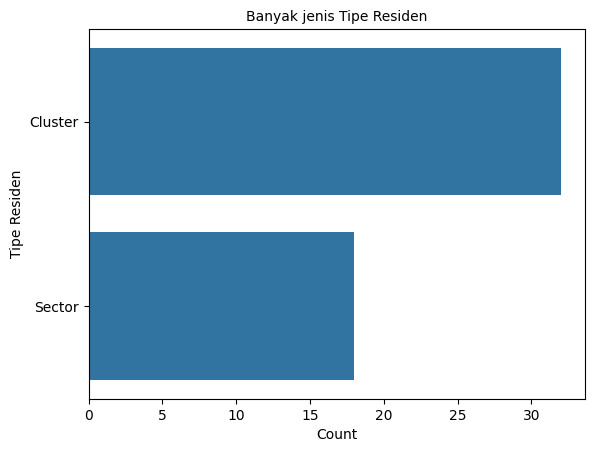

In [14]:
x = df['Tipe Residen'].value_counts().head(5)
sns.barplot(x = x.values, y = x.index, )
plt.title('Banyak jenis Tipe Residen', fontsize = 10)
plt.xlabel('Count')
plt.ylabel('Tipe Residen');

Berikut detil jumlah Profesi dan jumlah transaksi yang terjadi

In [15]:
x = df['Profesi'].nunique()
print("Terdapat total {} negara".format(x))

Profesi = pd.DataFrame(df['Profesi'].value_counts()).reset_index()
Profesi.columns = ['Profesi', 'Jumlah Transaksi']
Profesi

Terdapat total 5 negara


,Profesi,Jumlah Transaksi
0,Wiraswasta,20
1,Professional,18
2,Ibu Rumah Tangga,7
3,Pelajar,3
4,Mahasiswa,2


Customer Segmentation

Kelompok Umur:
- Muda (≤ 25 tahun)
- Dewasa (26 - 49 tahun)
- Lansia (≥ 50 tahun)

Kelompok Spending Behavior (berdasarkan kuartil):
- Low Spender: < 5.25 juta
- Medium Spender: 5.25 juta - 9.73 juta
- High Spender: > 9.73 juta

In [16]:
# 1. Membuat kategori Umur
def kategori_umur(umur):
    if umur <= 25:
        return "Muda"
    elif 26 <= umur <= 49:
        return "Dewasa"
    else:
        return "Lansia"

df['Kategori_Umur'] = df['Umur'].apply(kategori_umur)

# 2. Membuat kategori Spending berdasarkan kuartil
def kategori_spending(nilai):
    if nilai < 5257530:
        return "Low Spender"
    elif 5257530 <= nilai <= 9739615:
        return "Medium Spender"
    else:
        return "High Spender"

df['Kategori_Spending'] = df['NilaiBelanjaSetahun'].apply(kategori_spending)

# Menampilkan hasil
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun Kategori_Umur Kategori_Spending  
0       Sector              9497927        Lansia    Medium Spender  
1      Cluster              2722700          Muda       Low Spender  
2      Cluster              5286429        Dewasa    Medium Spender  
3      Cluster              5204498        Lansia       Low Spender  
4      Cluster             10615206        Dewasa      High Spender  


In [ ]:
scaler = StandardScaler()
df_scaled1 = scaler.fit_transform(df[['Umur', 'NilaiBelanjaSetahun']])

In [ ]:
n_clusters_options = [2, 3, 4, 5, 6]  
linkage_options = ['ward', 'complete', 'average', 'single']
metric_options = ['euclidean', 'manhattan', 'cosine']

best_score = -1
best_params = {}

for n_clusters in n_clusters_options:
    for linkage in linkage_options:
        for metric in metric_options:
            # 'ward' hanya mendukung 'euclidean'
            if linkage == 'ward' and metric != 'euclidean':
                continue
            try:
                # Model Agglomerative Clustering
                model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
                labels = model.fit_predict(df_scaled1)
                
                # Cek apakah jumlah cluster valid
                if len(np.unique(labels)) < 2:
                    continue
                
                # Hitung silhouette score
                score = silhouette_score(df_scaled1, labels, metric=metric)
                print(f"n_clusters={n_clusters}, linkage={linkage}, metric={metric}, silhouette_score={score:.4f}")
                
                # Simpan parameter terbaik
                if score > best_score:
                    best_score = score
                    best_params = {"n_clusters": n_clusters, "linkage": linkage, "metric": metric}
            except Exception as e:
                print(f"Error with n_clusters={n_clusters}, linkage={linkage}, metric={metric}: {e}")

print("\nBest parameters:", best_params, "with silhouette score:", best_score)

Error with n_clusters=2, linkage=ward, affinity=euclidean: __init__() got an unexpected keyword argument 'affinity'
Error with n_clusters=2, linkage=complete, affinity=euclidean: __init__() got an unexpected keyword argument 'affinity'
Error with n_clusters=2, linkage=complete, affinity=manhattan: __init__() got an unexpected keyword argument 'affinity'
Error with n_clusters=2, linkage=complete, affinity=cosine: __init__() got an unexpected keyword argument 'affinity'
Error with n_clusters=2, linkage=average, affinity=euclidean: __init__() got an unexpected keyword argument 'affinity'
Error with n_clusters=2, linkage=average, affinity=manhattan: __init__() got an unexpected keyword argument 'affinity'
Error with n_clusters=2, linkage=average, affinity=cosine: __init__() got an unexpected keyword argument 'affinity'
Error with n_clusters=2, linkage=single, affinity=euclidean: __init__() got an unexpected keyword argument 'affinity'
Error with n_clusters=2, linkage=single, affinity=manha